## 🧠 **Sentiment Analysis on IMDB Movie Reviews**


## **Business Overview**

### **Project Title:**

**Sentiment Analysis on IMDB Movie Reviews**

### **Project Summary:**

The *Sentiment Analysis on IMDB Movie Reviews* project aims to develop an intelligent system capable of automatically analyzing and classifying movie reviews into positive, negative, or neutral sentiments. By leveraging Natural Language Processing (NLP) and Machine Learning (ML) techniques, this project will help businesses, film studios, and media analysts understand public opinion and improve decision-making related to movie marketing, production, and audience engagement.

---

### **Business Need / Problem Statement:**

In the entertainment industry, understanding audience feedback is crucial for success. Movie reviews on platforms such as IMDB contain valuable insights into customer preferences, emotional responses, and satisfaction levels. However, the vast volume of unstructured text data makes manual analysis inefficient and error-prone.
This project addresses this challenge by automating sentiment detection, enabling stakeholders to:

* Quickly gauge audience reactions.
* Identify key factors influencing movie ratings.
* Enhance marketing and content strategies based on real-time sentiment trends.

---

### **Objectives:**

1. **Develop** a sentiment analysis model to classify IMDB reviews as *positive*, *negative*, or *neutral*.
2. **Preprocess** and clean large-scale textual data for efficient analysis.
3. **Apply** machine learning and deep learning algorithms to achieve high accuracy and performance.
4. **Visualize** sentiment trends and insights using dashboards or visual tools.
5. **Support** decision-making in movie marketing and audience analytics.

---

### **Scope:**

* **Data Source:** IMDB movie review dataset.
* **Tech Stack:** Python, Pandas, Scikit-learn, TensorFlow/Keras, NLTK, Matplotlib/Seaborn.
* **Deliverables:**

  * Cleaned and preprocessed dataset.
  * Trained sentiment classification model.
  * Accuracy and performance reports.
  * Visualization dashboard or summary report.

---

### **Business Value / Impact:**

* **Enhanced Market Insights:** Understand how audiences perceive different genres, actors, and storylines.
* **Improved Decision-Making:** Enable production houses to make data-driven content and marketing choices.
* **Reputation Management:** Quickly detect negative sentiments and respond effectively.
* **Competitive Advantage:** Use sentiment insights to predict box office performance and refine strategies.

---

### **Potential Stakeholders:**

* Film Production Companies
* Marketing & PR Teams
* Streaming Platforms
* Data Analytics Firms
* Audience Research Departments

---

Would you like me to add a **“Technical Overview”** section next (including model architecture, data preprocessing steps, and algorithm choices)? That would make it suitable for an academic or professional project report.


### **Step 1: Install and import dependencies**


In [ ]:
!pip install kagglehub pandas numpy scikit-learn tensorflow matplotlib seaborn


In [ ]:
### **Step 2: Download dataset**

import kagglehub
import pandas as pd
import os

# Download dataset from Kaggle
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

# Load the dataset
data_path = os.path.join(path, "IMDB Dataset.csv")
df = pd.read_csv(data_path)
print(df.head())

100%|██████████| 25.7M/25.7M [00:00<00:00, 128MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


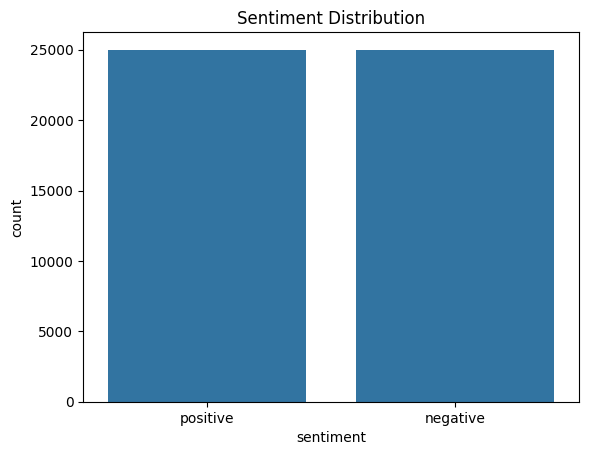

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
### **Step 3: Basic EDA (Exploratory Data Analysis)**


import seaborn as sns
import matplotlib.pyplot as plt

# Check data balance
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

print(df['review'][0])


In [ ]:
### **Step 4: Data Preprocessing**

# We'll clean text and convert labels (`positive`/`negative`) to numerical form.


import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Clean the text
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)

# Encode labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  # positive=1, negative=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'],
                                                    test_size=0.2, random_state=42)


In [ ]:

### **Step 5: Text Vectorization**

# Use TF-IDF to convert text to numerical features.


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


### **Step 6: Model Training (Logistic Regression)**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8948
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [ ]:
### **Step 9 (Alternative): Test with Custom Reviews (Logistic Regression)**

def predict_sentiment_lr(review):
    review = clean_text(review)
    # Use the TF-IDF vectorizer fitted on the training data
    seq = tfidf.transform([review])
    # Use the Logistic Regression model for prediction
    pred = model.predict(seq)[0]
    return "Positive 😀" if pred == 1 else "Negative 😞"

print(predict_sentiment_lr("The movie was absolutely fantastic!"))
print(predict_sentiment_lr("I hated this movie, it was boring and too long."))

Positive 😀
Negative 😞


### **Step 6 (Alternative): Model Training (Simple ANN)**


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Simple ANN Model
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert sparse matrix to dense for ANN
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

history_ann = model_ann.fit(X_train_tfidf_dense, y_train, epochs=5, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7425 - loss: 0.5247 - val_accuracy: 0.8874 - val_loss: 0.2715
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9148 - loss: 0.2291 - val_accuracy: 0.8878 - val_loss: 0.2751
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9334 - loss: 0.1812 - val_accuracy: 0.8845 - val_loss: 0.2892
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9467 - loss: 0.1562 - val_accuracy: 0.8816 - val_loss: 0.3154
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9634 - loss: 0.1149 - val_accuracy: 0.8815 - val_loss: 0.3507


In [ ]:
### **Step 9 (Alternative): Test with Custom Reviews (Simple ANN)**

def predict_sentiment_ann(review):
    review = clean_text(review)
    # Use the TF-IDF vectorizer fitted on the training data
    seq = tfidf.transform([review])
    # Convert sparse matrix to dense for ANN prediction
    pad = seq.toarray()
    # Use the ANN model for prediction
    pred = model_ann.predict(pad)[0][0]
    return "Positive 😀" if pred > 0.5 else "Negative 😞"

print(predict_sentiment_ann("The movie was absolutely fantastic!"))
print(predict_sentiment_ann("I hated this movie, it was boring and too long."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Positive 😀
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Negative 😞


### **Step 7: Deep Learning Alternative (LSTM model using TensorFlow/Keras)**


In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# LSTM Model
model_lstm = Sequential([
    Embedding(10000, 128, input_length=maxlen),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_lstm.fit(X_train_pad, y_train, epochs=1, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 106s 409ms/step - accuracy: 0.7024 - loss: 0.5622 - val_accuracy: 0.8426 - val_loss: 0.3629


In [ ]:

### **Step 8: Evaluate the LSTM model**

loss, accuracy = model_lstm.evaluate(X_test_pad, y_test)
print(f"LSTM Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8462 - loss: 0.3563
LSTM Test Accuracy: 0.8510


In [ ]:
### **Step 9 (Alternative): Test with Custom Reviews (LSTM)**

def predict_sentiment_lstm(review):
    review = clean_text(review)
    # Use the same tokenizer fitted on the training data
    seq = tokenizer.texts_to_sequences([review])
    # Pad the sequence to the same maxlen
    pad = pad_sequences(seq, maxlen=maxlen)
    # Use the LSTM model for prediction
    pred = model_lstm.predict(pad)[0][0]
    return "Positive 😀" if pred > 0.5 else "Negative 😞"

print(predict_sentiment_lstm("The movie was absolutely fantastic!"))
print(predict_sentiment_lstm("I hated this movie, it was boring and too long."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Positive 😀
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Negative 😞
